## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Set path to data files
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

# Read the data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
CompleteDF = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
CompleteDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
numberMice = len(CompleteDF["Mouse ID"].unique())
numberMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateData = CompleteDF[CompleteDF.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicateID = duplicateData["Mouse ID"].unique()
duplicateID

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = CompleteDF[(CompleteDF['Mouse ID'] != 'g989')]
cleanDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
RegimentDF = cleanDF.groupby("Drug Regimen")
Regiment = RegimentDF.count().index
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
volMean = RegimentDF["Tumor Volume (mm3)"].mean()
volMedian = RegimentDF["Tumor Volume (mm3)"].median()
volVariance = RegimentDF["Tumor Volume (mm3)"].var()
volStdDev = RegimentDF["Tumor Volume (mm3)"].std()
volSEM = RegimentDF["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

regSummary = pd.DataFrame({"Drug Regiment": Regiment, "Mean Volume": volMean, "Median Volume": volMedian, 
                                "Variance Volume": volVariance, "Standard Deviation": volStdDev, 
                                "SEM": volSEM})
# Preview DataFrame
regSummary = regSummary.reset_index(drop=True)
regSummary

,Drug Regiment,Mean Volume,Median Volume,Variance Volume,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regAggSummaryDF = pd.DataFrame(cleanDF.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}))
regAggSummaryDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

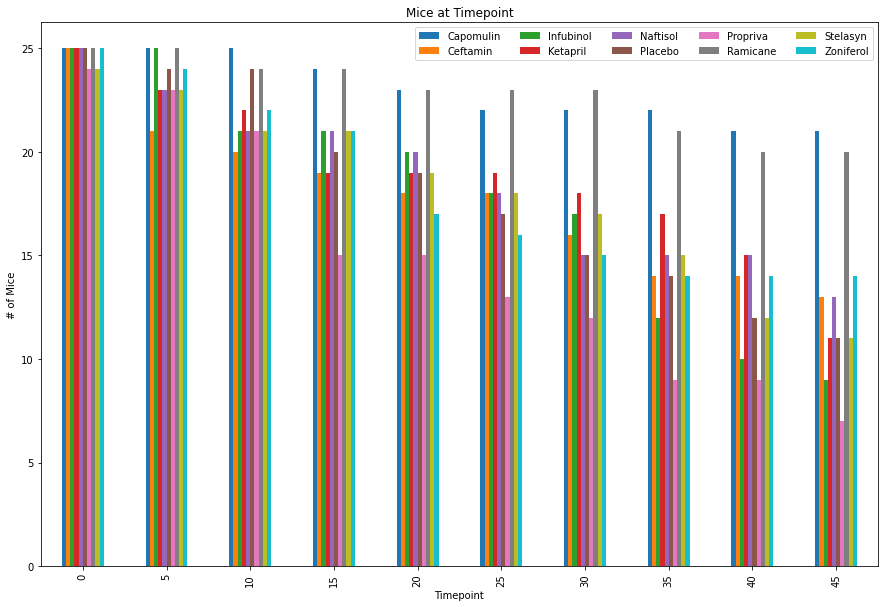

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regTime = cleanDF.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].nunique()
regTimeDF = pd.DataFrame(regTime)
regTimeDF.rename(index={0: "Timepoint", 1: "Drug Regimen", 2: "Mice"})
regTimeDFBAR = regTimeDF.unstack()
regTimeDFBAR.columns = regTimeDFBAR.columns.droplevel()
multi_plot = regTimeDFBAR.plot(kind="bar", figsize=(15, 10))

multi_plot.set_title("Mice at Timepoint")
multi_plot.set_xlabel('Timepoint')
multi_plot.set_ylabel('# of Mice')
multi_plot.legend(ncol=5)


Text(0.5, 1.0, 'Mice By Gender')

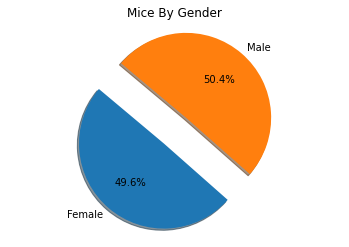

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleanDF['Sex'].unique()
count = cleanDF.groupby(['Sex'])['Mouse ID'].nunique()
explode = (0.2, 0.2)
plt.pie(count, labels=gender, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Mice By Gender")

## Quartiles, Outliers and Boxplots

In [9]:
#create new DF by merging the timepoints into the turmor volume DF

timepointFinal = cleanDF.groupby(['Mouse ID'])['Timepoint'].max()
timepointFinal = pd.DataFrame(timepointFinal)

VolumeDF = timepointFinal.merge(cleanDF, how='left', on=['Mouse ID','Timepoint'])
VolumeDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [10]:
#Avg by drug
VolumeDrugAvg = VolumeDF.groupby("Drug Regimen").mean()
#final vol avg
DrugSortAvg = VolumeDrugAvg.sort_values(by=['Tumor Volume (mm3)'], ascending=True)
#choose 4 regiments of interest
regimensInterest = DrugSortAvg.iloc[0:4]
regimensInterest

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Ramicane,40.600000,36.191390,1.200000,10.840000,20.000000
Capomulin,41.000000,36.667568,1.280000,14.040000,20.120000
Propriva,25.833333,56.493884,1.541667,9.416667,27.291667
Ceftamin,30.600000,57.753977,1.720000,12.800000,27.400000


In [14]:
InterestList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimensInterest = pd.DataFrame({"Drug Regimen": InterestList})

upperbounds =[]
lowerbounds = []
iqrs = []

for drug in InterestList:
    everydrug = VolumeDF.loc[VolumeDF['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    
    quartiles = everydrug.quantile([.25,.5,.75])
    
    lowerQ = quartiles[0.25]

    upperQ = quartiles[0.75]

    iqr = upperQ-lowerQ
    
    lowerbound = lowerQ - (1.5*iqr)
    
    upperbound = upperQ + (1.5*iqr)
    
    upperbounds.append(upperbound)
    
    lowerbounds.append(lowerbound)
    
    iqrs.append(iqr)
    
regimensInterest['Upper Bound'] = upperbounds
regimensInterest['Lower Bound'] = lowerbounds
regimensInterest['IQR'] = iqr

In [15]:
regimensInterest

,Drug Regimen,Upper Bound,Lower Bound,IQR
0,Capomulin,51.832015,20.704562,15.577752
1,Ramicane,54.306811,17.912664,15.577752
2,Infubinol,82.741446,36.832905,15.577752
3,Ceftamin,87.666458,25.355450,15.577752


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Boxplot = pd.DataFrame({"Drug": regimentsofInterest["Drug Regimen"],
                            "Volume": interestFinal["Tumor Volume (mm3)"]})
interestBox



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
